In [49]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import seaborn as sns

In [50]:
# Load the dataset
data = pd.read_csv('Reviews.csv')

In [51]:
# Filterize the text attribute
stop_words = set(stopwords.words('english'))
data['Filtered_Text'] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [52]:
# Define a function to classify the sentiment
def get_sentiment(row):
    text = TextBlob(row['Filtered_Text'])
    score = row['Score']
    if text.sentiment.polarity > 0:
        if score > 3:
            return 'positive'
        elif score == 3:
            return 'neutral'
        else:
            return 'positive'
    elif text.sentiment.polarity == 0:
        return 'neutral'
    else:
        if score > 3:
            return 'positive'
        elif score == 3:
            return 'neutral'
        else:
            return 'negative'


In [53]:
# Apply the sentiment analysis to the reviews
data['Sentiment'] = data.apply(get_sentiment, axis=1)

# Count the total number of each category
positive_reviews = data[data['Sentiment'] == 'positive']
neutral_reviews = data[data['Sentiment'] == 'neutral']
negative_reviews=data[data['Sentiment'] == 'negative']

In [54]:
print('Total Positive Reviews:', len(positive_reviews))
print('Total Neutral Reviews:', len(neutral_reviews))
print('Total Negative Reviews:', len(negative_reviews))

Total Positive Reviews: 486406
Total Neutral Reviews: 52390
Total Negative Reviews: 29658


In [55]:
 # Print the classified reviews
# for i, row in data.iterrows():
#     print('Review:', row['Filtered_Text'])
#     print('Sentiment:', row['Sentiment'])
#     print('-----')
#this will print review and sentiment...since it's very long commenting it.Not required

<module 'matplotlib.pyplot' from 'c:\\Users\\KIIT\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

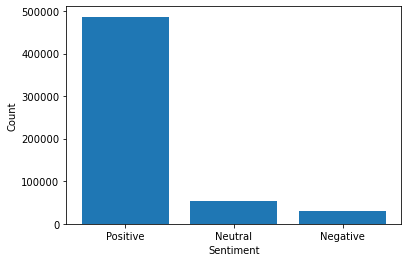

In [56]:
import matplotlib.pyplot as plt

# Define the counts of each sentiment
positive_count = 486406
neutral_count = 52390
negative_count = 29658

# Create a bar chart
sentiment_counts = [positive_count, neutral_count, negative_count]
sentiments = ['Positive', 'Neutral', 'Negative']
plt.bar(sentiments, sentiment_counts)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt


In [57]:
from textblob import TextBlob

# Add polarity and subjectivity columns to the data frame
data['Polarity'] = data['Filtered_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['Subjectivity'] = data['Filtered_Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [58]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Filtered_Text,Sentiment,Polarity,Subjectivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I bought several Vitality canned dog food prod...,positive,0.440000,0.420000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted Peanuts.....,negative,-0.033333,0.762963
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"This confection around centuries. It light, pi...",positive,0.187000,0.548000
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If looking secret ingredient Robitussin I beli...,positive,0.150000,0.650000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy great price. There wide assortment...,positive,0.458333,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Great sesame chicken..this good better restura...,positive,0.675000,0.662500
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,I'm disappointed flavor. The chocolate notes e...,negative,-0.208333,0.408333
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...","These stars small, give 10-15 one training ses...",positive,-0.021875,0.418750
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,These BEST treats training rewarding dog good ...,positive,0.517857,0.678571


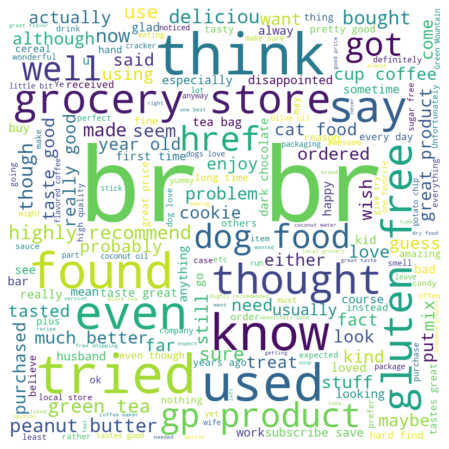

In [59]:
from wordcloud import WordCloud

# Create a text string by joining all the filtered reviews
text = ' '.join(review for review in data['Filtered_Text'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


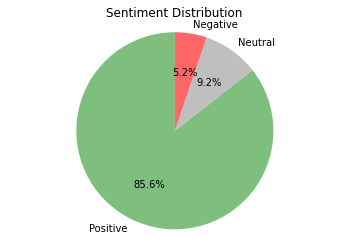

In [60]:
import matplotlib.pyplot as plt

# Define labels and sizes for the pie chart
labels = ['Positive', 'Neutral', 'Negative']
sizes = [486406, 52390, 29658]

# Define colors for the different sentiments
colors = ['#7ebf7e', '#bfbfbf', '#ff6666']

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title to the pie chart
ax1.set_title("Sentiment Distribution")

# Show the pie chart
plt.show()


for traning data extracting 20k sample for each category 

In [61]:
positive_data_train = data.loc[data['Sentiment'] == 'positive'][:10000]
negative_data_train = data.loc[data['Sentiment'] == 'negative'][:10000]
neutral_data_train = data.loc[data['Sentiment'] == 'neutral'][:10000]


for test data extracting next 8k sample for each category

In [62]:
test_pos = data[data['Sentiment'] == 'positive'].iloc[10000:15000]
test_neg = data[data['Sentiment'] == 'negative'].iloc[10000:15000]
test_neu = data[data['Sentiment'] == 'neutral'].iloc[10000:15000]


In [63]:
positive_data_train.shape
negative_data_train.shape
neutral_data_train.shape

(10000, 14)

In the context of combining the train data, the shape function is used to check the number of rows and columns in the train_pos, train_neg, and train_neu DataFrames, and then concatenate them along the rows.

The shape function in Python returns a tuple of integers representing the shape of a NumPy array or Pandas DataFrame. In the code for combining the train data, the shape function is used to check the number of rows and columns of each DataFrame to ensure that they have the same number of columns before concatenating them along the rows. By using the shape function, we can ensure that the data is properly aligned before combining them.

In [64]:
# combining the training samples and shuffling them
training_sample = pd.concat([positive_data_train, negative_data_train, neutral_data_train]).sample(frac=1).reset_index(drop=True)

# .concat() combines the datasets
# .sample(frac=1) shuffles the dataset
# .reset_index(drop=True) resets the index of the dataset

In [65]:
training_sample.shape

(30000, 14)

In [66]:
test_pos.shape
test_neg.shape
test_neu.shape

(5000, 14)

In [67]:
# combining the testing samples and shuffling them
testing_sample = pd.concat([test_pos, test_neg, test_neu]).sample(frac=1).reset_index(drop=True)

In [68]:
testing_sample.shape

(15000, 14)

In [69]:
training_sample

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Filtered_Text,Sentiment,Polarity,Subjectivity
0,11640,B0032RPLSY,A3IU2PQXCUZPTA,FearFox,21,21,5,1276560000,Good stuff,I don't know if I have a lot of credibility to...,"I know I lot credibility review this, since fi...",positive,0.415333,0.551333
1,92342,B007TGDXMK,ASW22V6LI995Z,rampageous_cuss,16,20,3,1322092800,Weak at High Setting,This product is an interesting cross between a...,This product interesting cross Keurig cup pod....,neutral,0.026265,0.370164
2,129707,B000EQYSLC,A2DTB7WNWQ22UM,Jack,5,11,1,1323043200,Some are so hard they will break your teeth!!,"Tried these the other day, put some in my mout...","Tried day, put mouth colors hard like rocks. N...",negative,-0.422743,0.313889
3,3840,B000X2CWTM,A3J8GABH8L5OYY,Anonymous,1,6,4,1274313600,Decent licorice,"Not the best I've ever had, but good. The best...","Not best I've ever had, good. The best I've ex...",positive,0.352778,0.483333
4,3069,B000FDKQCO,A1L3J2SGJTPPLW,"Cosmic Mama ""cosmic mama""",2,2,5,1272585600,"Healtier, but not guilt-free...","My kids love brownies, but I could no longer b...","My kids love brownies, I could longer regular ...",positive,0.271667,0.532179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,71740,B001EQ5482,A1J3EVBOS6UYNK,"Y. ELHENNAWY ""ye222""",0,2,1,1327881600,"Amazon ships balanced nutty, not what I ordered","I ordered 6 bags of Medium Colombian Coffee, w...","I ordered 6 bags Medium Colombian Coffee, I st...",negative,-0.100000,1.000000
29996,170162,B002ZOG29C,A21ZRJE1AHHV35,Katie,1,1,1,1345075200,"Eight O'Clock Coffee, 100% Colombian Ground, 3...","At one time many years ago, this coffee was go...","At one time many years ago, coffee good. Now, ...",negative,-0.042857,0.484524
29997,700,B000G6MBX2,A31UITXO8QXG3H,Jay M. Clayton,0,0,5,1243987200,delicious and healthy,"I used to buy these at the local supermarket, ...","I used buy local supermarket, longer carried t...",positive,0.450000,0.500000
29998,60250,B004OLS4UO,A3QHIWFZHMDKG5,EB,0,0,3,1349481600,Disagreeable Taste,Eye Bought This Product On A Recommendation. H...,Eye Bought This Product On A Recommendation. H...,neutral,-0.087500,0.350000


In [70]:
# selecting the needed columns for training and testing samples
# review text , polarity, sentiment

# training sample
training_sample = training_sample[['Filtered_Text', 'Polarity', 'Sentiment']]

# testing sample
testing_sample = testing_sample[['Filtered_Text', 'Polarity', 'Sentiment']]

In [71]:
# Splitting the training sample into X_train and y_train
X_train = training_sample['Filtered_Text']
y_train = training_sample['Sentiment']

# Splitting the testing sample into X_test and y_test
X_test = testing_sample['Filtered_Text']
y_test = testing_sample['Sentiment']

importing required libraries for training and testing

In [72]:
# we will perform Naive Bayes, SVM, Random Forest and Logistic Regression on the dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Vectorizing data is the process of converting textual or categorical data into numerical vectors that can be used for machine learning models. Machine learning models cannot work with raw text or categorical data directly; instead, they require numerical inputs.

Vectorizing data is necessary for several reasons:

Most machine learning algorithms require numerical inputs.

Numerical vectors can capture the meaning and relationships between words or categories in a way that is useful for machine learning models.

Vectorization can help reduce the dimensionality of the data, making it easier to work with and reducing the risk of overfitting.

It can also help improve the performance of machine learning models by providing more informative input data.

#vectorizing

In [73]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# define preprocessing function
def preprocess_text(text):
    # convert text to lowercase
    text = text.lower()
    # remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # return preprocessed text
    return text

# instantiate CountVectorizer object
vectorizer = CountVectorizer(preprocessor=preprocess_text, stop_words='english')

# fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# transform the testing data
X_test = vectorizer.transform(X_test)


Linear regression is not suitable for classification tasks, as it is a regression algorithm that predicts continuous values rather than discrete categories. Therefore, we cannot use linear regression to build a classification model.

so we are using logistic regression, decision trees, random forests, SVM, etc. to build a classification model. 

# logistic regression

Logistic Regression is a supervised learning algorithm used for binary classification tasks. In Logistic Regression, the goal is to find the relationship between the input features and the probability of belonging to a certain class. This is done by fitting a logistic function to the training data, which models the probability of the positive class as a function of the input features. Logistic Regression can handle both linear and non-linear relationships between the input features and the target variable, and it can also be extended to handle multi-class classification problems.

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# create a logistic regression model
model = LogisticRegression()

# fit the model on the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)


c:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7134
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.86      0.84      5000
     neutral       0.60      0.63      0.62      5000
    positive       0.71      0.64      0.68      5000

    accuracy                           0.71     15000
   macro avg       0.71      0.71      0.71     15000
weighted avg       0.71      0.71      0.71     15000

Confusion Matrix:
 [[4322  547  131]
 [ 672 3166 1162]
 [ 238 1549 3213]]


# SVM

SUPPORT VECTOR MACHINES (SVM):
Support Vector Machines, or SVMs for short, are a popular machine learning model that is often used for classification tasks.
The idea behind SVM is to find the hyperplane that best separates the data points into different classes. The hyperplane 
is chosen such that it maximizes the margin, which is the distance between the hyperplane and the closest points from each class.
SVM can also be used for regression tasks by modifying the objective function. SVM is a powerful model that is capable of 
handling complex data sets and achieving high accuracy.
However, it can be sensitive to the choice of hyperparameters and may not perform well with noisy or overlapping data.

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an SVM object
svm = SVC(kernel='linear', C=1, random_state=42)

# Train the SVM model on the training data
svm.fit(X_train, y_train)

# Predict the labels of the test data using the trained SVM model
y_pred = svm.predict(X_test)

# Calculate the accuracy of the SVM model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report of the SVM model on the test data
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix of the SVM model on the test data
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7028666666666666
Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.87      0.83      5000
     neutral       0.59      0.61      0.60      5000
    positive       0.71      0.63      0.67      5000

    accuracy                           0.70     15000
   macro avg       0.70      0.70      0.70     15000
weighted avg       0.70      0.70      0.70     15000

Confusion Matrix:
[[4332  551  117]
 [ 798 3060 1142]
 [ 314 1535 3151]]


# KNN

K-Nearest Neighbors (KNN) is a supervised learning algorithm used for classification and regression tasks. In KNN, the prediction for a new data point is made by finding the K closest data points in the training set and taking the majority vote or the average value of their corresponding target values. The value of K is a hyperparameter that can be tuned to achieve better performance. KNN is a simple and intuitive algorithm that can work well for small datasets and non-linear decision boundaries.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the KNN model with number of neighbors as 5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Test the model
y_pred = knn.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)


Accuracy: 0.4713333333333333
Classification Report:
               precision    recall  f1-score   support

    negative       0.56      0.51      0.54      5000
     neutral       0.39      0.63      0.48      5000
    positive       0.57      0.27      0.37      5000

    accuracy                           0.47     15000
   macro avg       0.51      0.47      0.46     15000
weighted avg       0.51      0.47      0.46     15000

Confusion Matrix:
 [[2573 2138  289]
 [1139 3137  724]
 [ 863 2777 1360]]


# Naive 

Naive Bayes is a probabilistic machine learning model that is often used for classification tasks. The model is based on Bayes' theorem, which states that the probability of a hypothesis (in this case, the class of a new data point) is proportional to the probability of the evidence (in this case, the features of the new data point) given the hypothesis. The "naive" part of Naive Bayes comes from the assumption that the features are independent of each other, which simplifies the computation. Naive Bayes is a fast and simple model that works well with high-dimensional data and can handle missing values. However, it may not perform well with correlated features or when the independence assumption is violated.

In [77]:
# import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# initialize the model
nb = MultinomialNB()

# train the model
nb.fit(X_train, y_train)

# make predictions on the test data
y_pred_nb = nb.predict(X_test)

# print accuracy score, classification report and confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Accuracy: 0.6462
Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.81      0.77      5000
     neutral       0.54      0.52      0.53      5000
    positive       0.66      0.61      0.63      5000

    accuracy                           0.65     15000
   macro avg       0.64      0.65      0.64     15000
weighted avg       0.64      0.65      0.64     15000

Confusion Matrix:
 [[4035  732  233]
 [1059 2623 1318]
 [ 448 1517 3035]]


# Decision tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# create Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# fit the classifier on the training data
dt_classifier.fit(X_train, y_train)

# predict on test data
y_pred = dt_classifier.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.672
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.81      0.78      5000
     neutral       0.60      0.57      0.58      5000
    positive       0.65      0.64      0.65      5000

    accuracy                           0.67     15000
   macro avg       0.67      0.67      0.67     15000
weighted avg       0.67      0.67      0.67     15000

Confusion Matrix:
 [[4035  602  363]
 [ 822 2861 1317]
 [ 495 1321 3184]]


# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.739
Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.88      0.84      5000
     neutral       0.67      0.62      0.65      5000
    positive       0.74      0.72      0.73      5000

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000

Confusion Matrix:
[[4385  472  143]
 [ 759 3114 1127]
 [ 355 1059 3586]]


# Hyperparameter

The param_grid dictionary specifies the hyperparameters to be tuned for the SVM model.

'C' is the regularization parameter that controls the trade-off between achieving a low training error and a low testing error. It's a positive float, with smaller values indicating stronger regularization. In this dictionary, it takes on the values of [0.1, 1, 10, 100].

'gamma' is the kernel coefficient. It determines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. In this dictionary, it takes on the values of [0.1, 1, 10, 100].

'kernel' is the kernel function to be used in the SVM model. In this dictionary, two kernel functions are specified: 'linear' and 'rbf'. The 'linear' kernel function uses a linear hyperplane to separate the classes, while the 'rbf' (Radial Basis Function) kernel function uses a non-linear hyperplane to separate the classes.

In [80]:
# Import the SVM classifier and GridSearchCV from scikit-learn
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define a dictionary of hyperparameters to tune using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

# Create an SVM classifier object
svm = SVC()

# Use GridSearchCV to find the best hyperparameters for the SVM model
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search.best_params_)

# Create a new SVM model object with the best hyperparameters and fit it to the training data
svm = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], kernel=grid_search.best_params_['kernel'])
svm.fit(X_train, y_train)

# Use the fitted SVM model to make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the accuracy, classification report, and confusion matrix of the SVM model on the test data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))


Best hyperparameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 0.7208
Classification Report:               precision    recall  f1-score   support

    negative       0.82      0.87      0.84      5000
     neutral       0.61      0.65      0.63      5000
    positive       0.75      0.64      0.69      5000

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000

Confusion Matrix: [[4350  577   73]
 [ 716 3268 1016]
 [ 262 1544 3194]]


# ensembled soft


c:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7194666666666667
Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      5000
     neutral       0.60      0.66      0.63      5000
    positive       0.74      0.63      0.68      5000

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



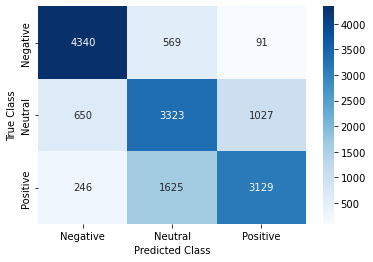

In [81]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define individual classifiers
svm_clf = SVC(kernel='linear', C=1, probability=True)
knn_clf = KNeighborsClassifier(n_neighbors=5)
nb_clf = MultinomialNB(alpha=0.1)
dt_clf = DecisionTreeClassifier(max_depth=10)
rf_clf = RandomForestClassifier(n_estimators=50)
lr_clf = LogisticRegression(C=1, solver='lbfgs', multi_class='multinomial')

# Define the ensemble classifier
ensemble_clf = VotingClassifier(estimators=[('svm', svm_clf), 
                                            ('knn', knn_clf), 
                                            ('nb', nb_clf),
                                            ('dt', dt_clf),
                                            ('rf', rf_clf),
                                            ('lr', lr_clf)], 
                                voting='soft')

# Fit the ensemble classifier on the training data
ensemble_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensemble_clf.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


In [82]:
import seaborn as sns


# ensemnle

c:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.711
Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.92      0.83      5000
     neutral       0.62      0.62      0.62      5000
    positive       0.77      0.59      0.67      5000

    accuracy                           0.71     15000
   macro avg       0.71      0.71      0.71     15000
weighted avg       0.71      0.71      0.71     15000



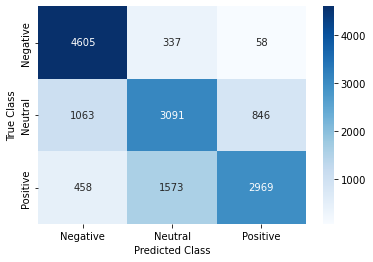

In [83]:
from sklearn.ensemble import VotingClassifier

# Define individual classifiers
svm_clf = SVC(kernel='linear', C=1)
knn_clf = KNeighborsClassifier(n_neighbors=5)
nb_clf = MultinomialNB(alpha=0.1)
dt_clf = DecisionTreeClassifier(max_depth=10)
rf_clf = RandomForestClassifier(n_estimators=50)
lr_clf = LogisticRegression()

# Define the ensemble classifier
ensemble_clf = VotingClassifier(estimators=[('svm', svm_clf), 
                                            ('knn', knn_clf), 
                                            ('nb', nb_clf),
                                            ('dt', dt_clf),
                                            ('rf', rf_clf),
                                            ('lr', lr_clf)], 
                                voting='hard')

# Fit the ensemble classifier on the training data
ensemble_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensemble_clf.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
